Step 1 : Get Data

In [11]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
%matplotlib inline

We will get stock information for the following banks:
Bank of America
CitiGroup
Goldman Sachs
JPMorgan Chase
Morgan Stanley
Wells Fargo

In [14]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [15]:
# Bank of America
BAC = data.DataReader("BAC", 'google', start, end)

# CitiGroup
C = data.DataReader("C", 'google', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'google', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'google', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'google', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'google', start, end)

In [16]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'google', start, end)

Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers

In [17]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.

In [18]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

Set the column name levels (this is filled out for you):

In [19]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

Check the head of the bank_stocks dataframe.

In [20]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

What is the max Close price for each bank's stock throughout the time period?

In [22]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

Create a new empty DataFrame called returns

In [23]:
returns = pd.DataFrame()

 Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [24]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


Create a pairplot using seaborn of the returns dataframe

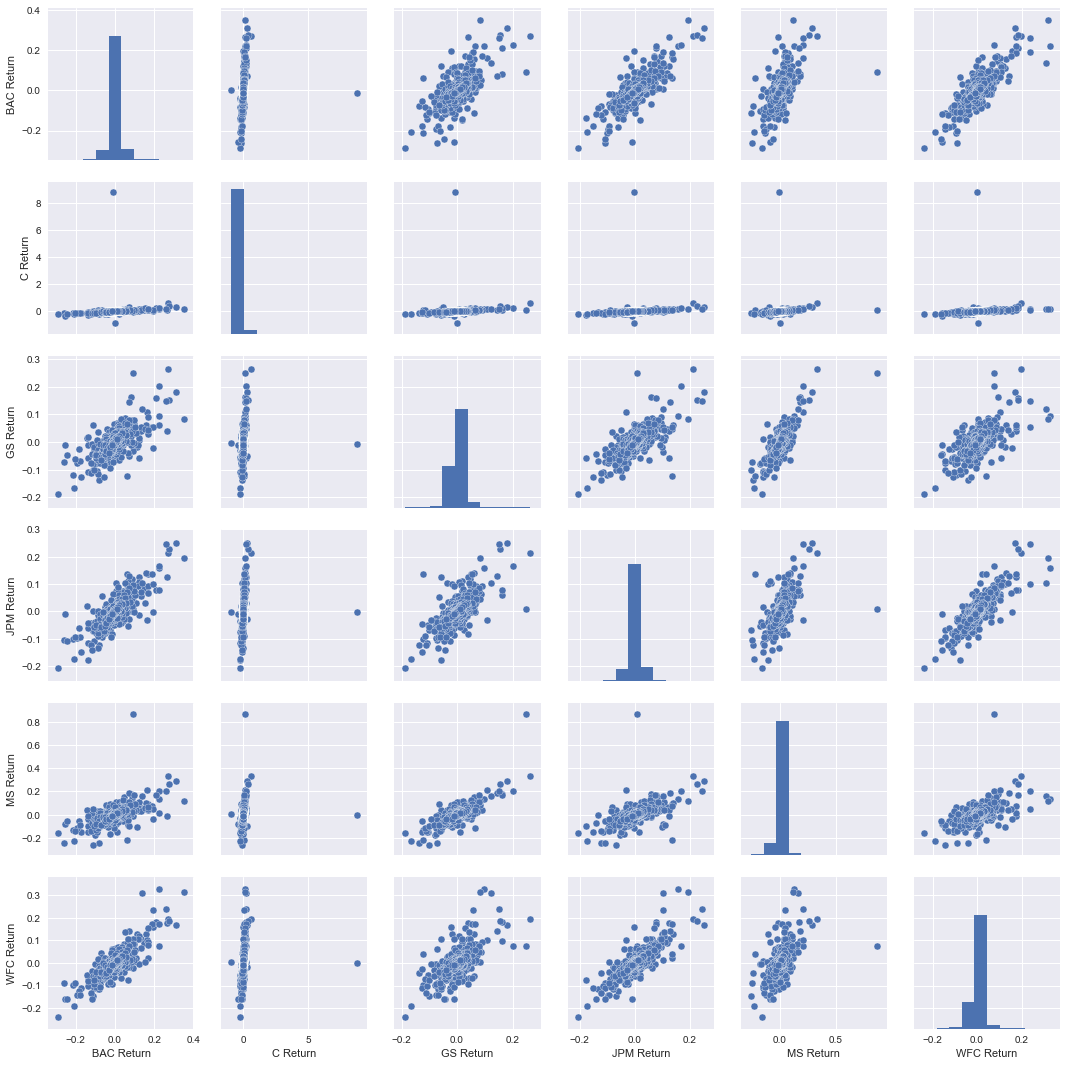

In [25]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

what dates each bank stock had the best and worst single day returns

In [26]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [27]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015

In [28]:
returns.std() # Citigroup riskiest

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [29]:
returns.ix['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

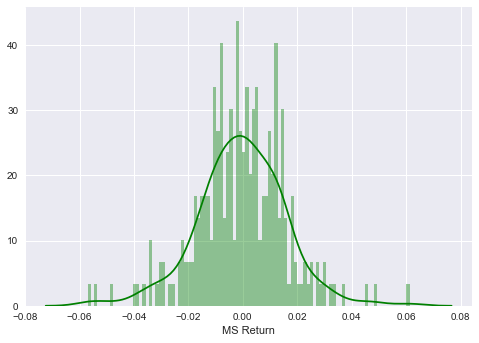

In [30]:
#Create a distplot using seaborn of the 2015 returns for Morgan Stanley
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

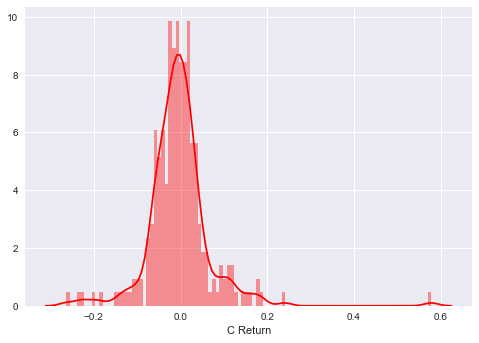

In [32]:
#Create a distplot using seaborn of the 2008 returns for CitiGroup
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

VAR model for US banking sector stocks

In [45]:
import numpy as np
import pyflux as pf
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [46]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

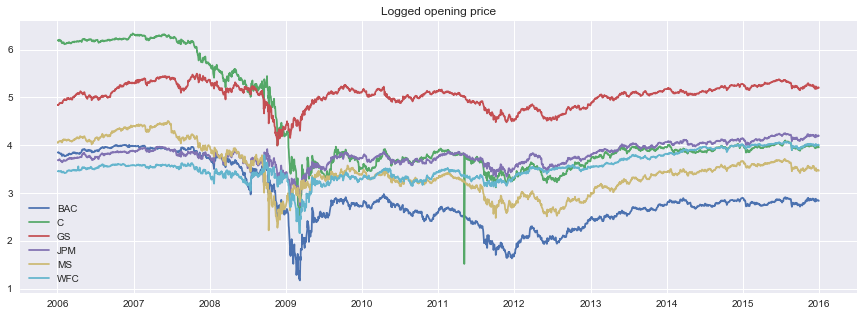

In [47]:
ibm = data.DataReader(['JPM','GS','BAC','C','WFC','MS'],  'google', start, end)
opening_prices = np.log(ibm['Open'])
plt.figure(figsize=(15,5));
plt.plot(opening_prices.index,opening_prices);
plt.legend(opening_prices.columns.values,loc=3);
plt.title("Logged opening price");

VAR specifications and see which one minimizes the AIC. Here we just opt for VAR(2) model, which we fit via OLS: 

In [49]:
y = pf.VAR(data=opening_prices,lags=2,integ=1)
x = y.fit()
x.summary()

VAR(2)                                                                                                    
======================================================= ==================================================
Dependent Variable: Differenced BAC,Differenced C,Diffe Method: OLS                                       
Start Date: 2006-01-05 00:00:00                         Log Likelihood: 34828.0884                        
End Date: 2015-12-31 00:00:00                           AIC: -69458.1768                                  
Number of observations: 2514                            BIC: -68881.0433                                  
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Differenced BAC Constant                 -0.0004    0.0008     -0.5647  0.5723   (-0.0019 | 0.0011)       
Differenced BAC AR(1)                

plot latent variables with plot_z:

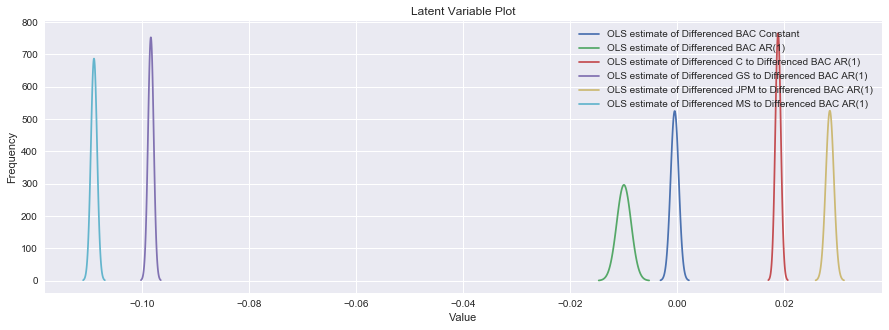

In [50]:
y.plot_z(list(range(0,6)),figsize=(15,5))

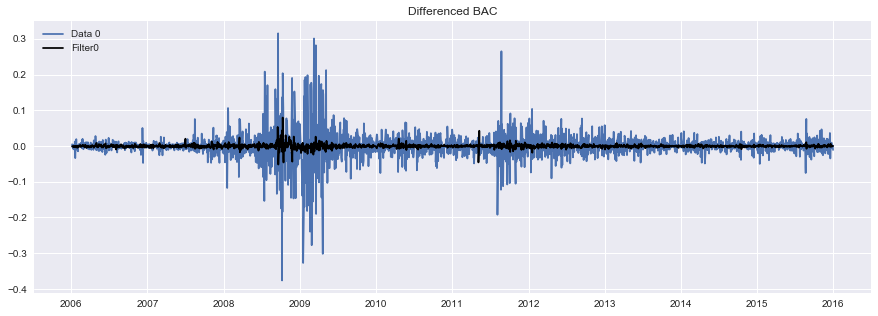

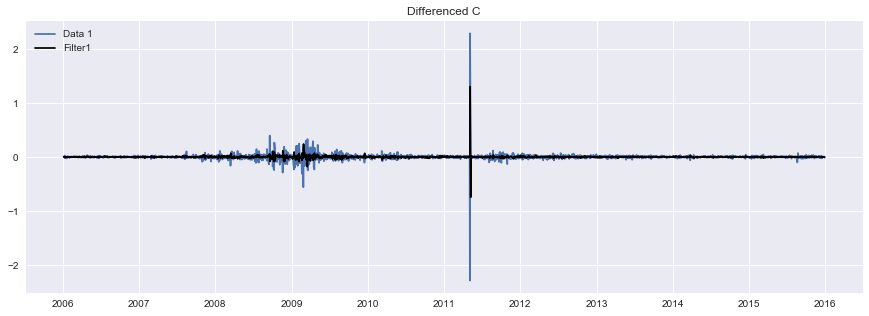

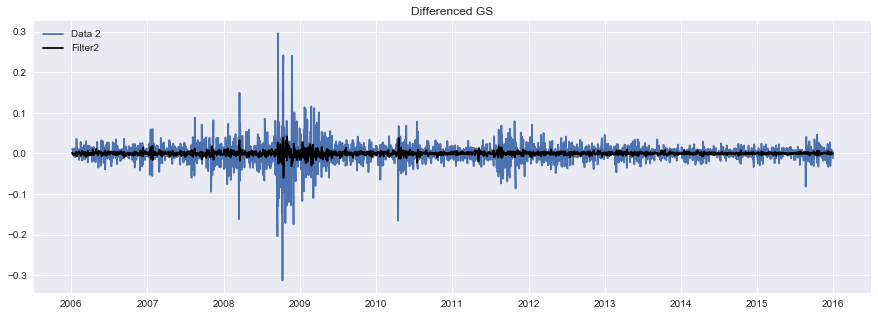

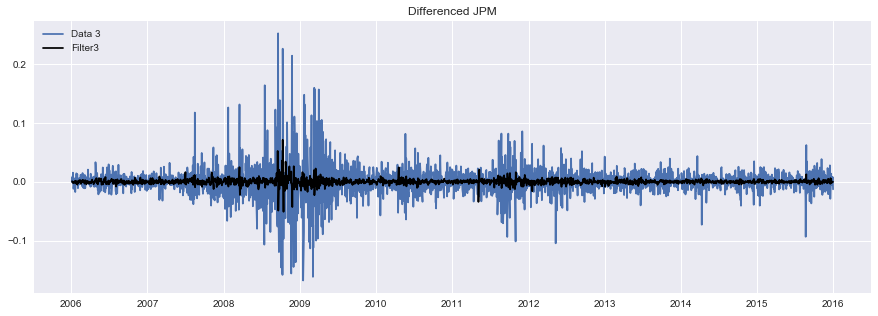

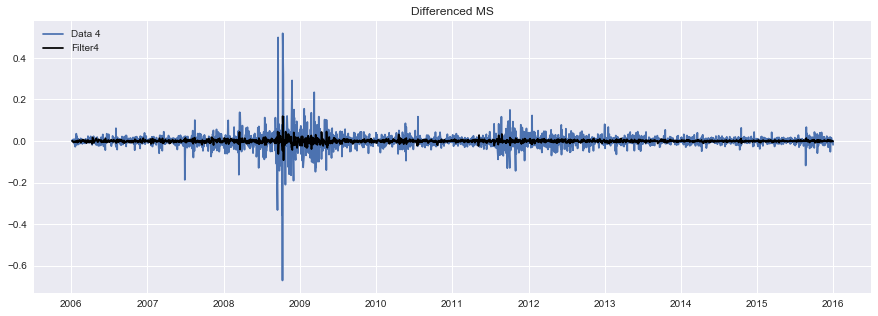

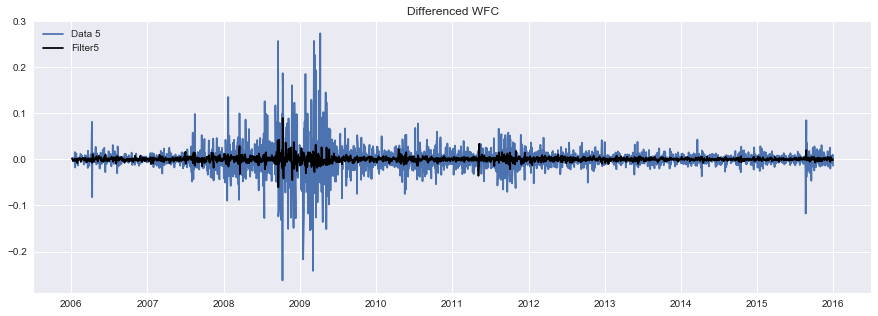

In [51]:
y.plot_fit(figsize=(15,5))

 make forward predictions with our model using plot_predict

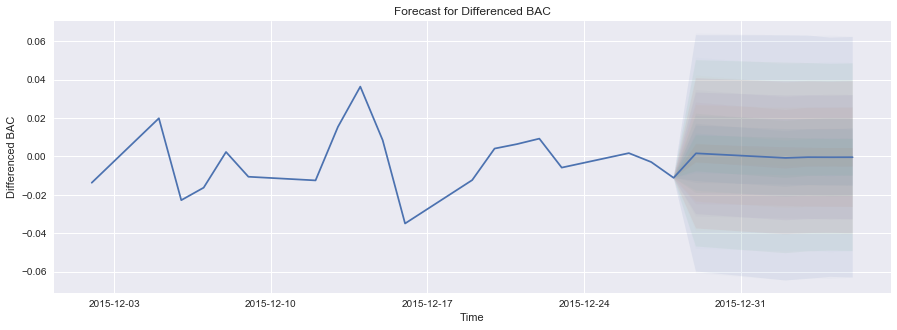

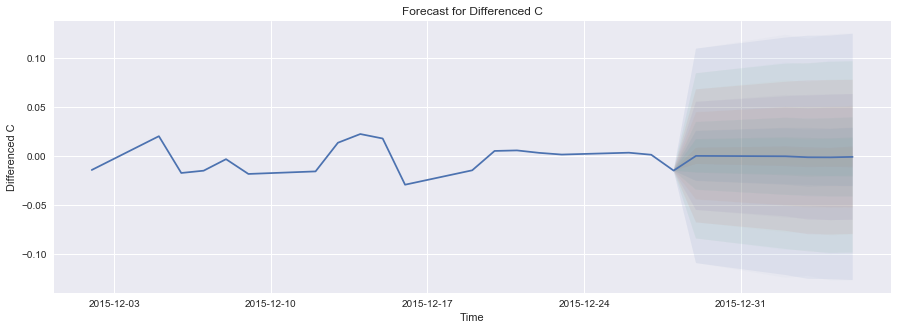

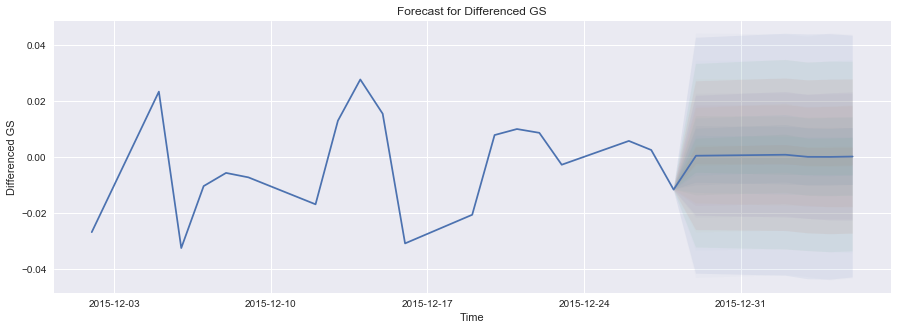

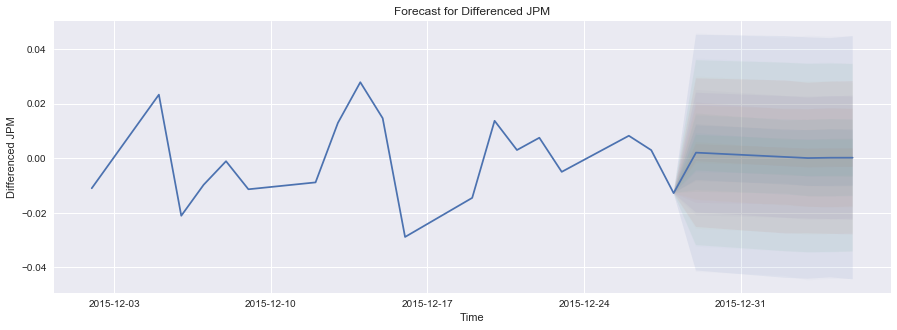

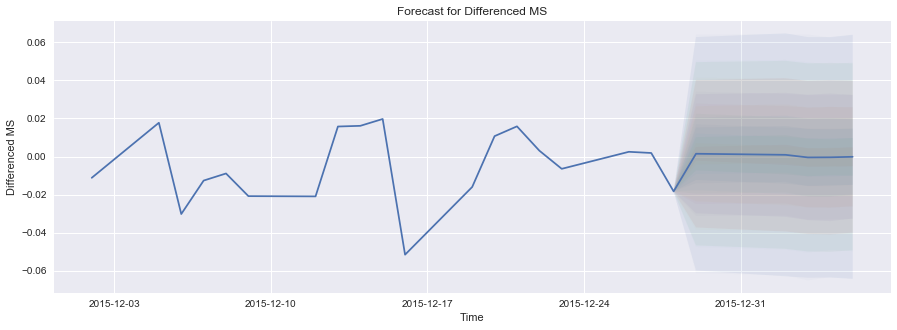

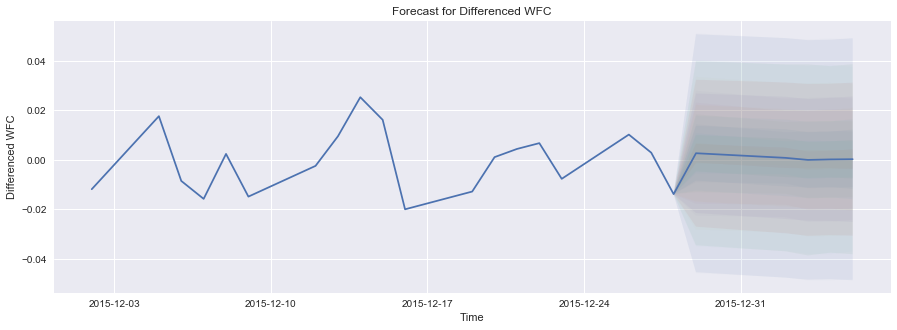

In [52]:
y.plot_predict(past_values=19,h=5,figsize=(15,5))